<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** AirBnb Listings - Mexico City, Distrito Federal, Mexico [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. You're a consultant for individuals and firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2025

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import os
#print(os.getcwd())--confirmo que estoy en airbnb para que sirva la importancion de data 


In [4]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### 1. Load the data

In [ ]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./data/listings.csv.gz")
print("se ha creado el objeto listings_df " +str(type (listings_df)))

se ha creado<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Showing dataframe dimensions -- tupla filas por columnas
listings_df.shape

(25425, 75)

In [32]:
# Showing column types
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [11]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
listings_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
21836,832920255182373384,https://www.airbnb.com/rooms/832920255182373384,20230627053501,2023-06-29,city scrape,Condo in Mexico City · 1 bedroom · 1 bed · 1 s...,"Es un muy amplio y lindo departamento, que ade...","La colonia Cuauhtemoc, es una colonia de casas...",https://a0.muscache.com/pictures/miso/Hosting-...,132535773,https://www.airbnb.com/users/show/132535773,Mary Carmen,2017-05-29,NaN,NaN,within a day,67%,100%,NaN,https://a0.muscache.com/im/pictures/user/a86fd...,https://a0.muscache.com/im/pictures/user/a86fd...,Colonia Cuauhtémoc,10,16,['phone'],t,t,"Mexico City, Ciudad de México, Mexico",Cuauhtémoc,NaN,19.431068,-99.167476,Private room in condo,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Wifi"", ""Washer"", ""Paid parking on premises"",...",$829.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,30,60,90,364,2023-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,5,3,2,0,NaN
11499,49051664,https://www.airbnb.com/rooms/49051664,20230627053501,2023-06-28,city scrape,Rental unit in Mexico City · ★4.91 · 3 bedroom...,"You will love this accommodation, which is loc...","Nice whole apartment, great location, safe and...",https://a0.muscache.com/pictures/774c43a2-cb60...,187855337,https://www.airbnb.com/users/show/187855337,Jaime Armando,2018-05-04,"Mexico City, Mexico","Vivo la vida ,día a día",within an hour,79%,97%,f,https://a0.muscache.com/im/pictures/user/f3b25...,https://a0.muscache.com/im/pictures/user/f3b25...,NaN,3,4,"['email', 'phone']",t,t,"Mexico City, Ciudad de México, Mexico",Cuauhtémoc,NaN,19.407640,-99.178380,Entire rental unit,Entire home/apt,5,NaN,1 bath,3.0,4.0,"[""Microwave"", ""Private entrance"", ""Hangers"", ""...","$1,256.00",1,30,1,1,1125,1125,1.0,1125.0,NaN,t,19,44,74,340,2023-06-28,34,12,1,2021-10-03,2023-06-24,4.91,4.97,4.97,5.00,5.00,4.97,4.79,NaN,f,3,3,0,0,1.61
9898,45219265,https://www.airbnb.com/rooms/45219265,20230627053501,2023-06-28,city scrape,Rental unit in Mexico City · ★4.88 · 1 bedroom...,"LOCATION, LOCATION, LOCATION!!!<br /><br />Apa...",NaN,https://a0.muscache.com/pictures/9d55937d-3bc8...,3426507,https://www.airbnb.com/users/show/3426507,Rodolfo,2012-08-30,"Mexico City, Mexico","Aventurero, sensible y relajado, me encanta ha...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/6506b...,https://a0.muscache.com/im/pictures/user/6506b...,NaN,9,13,"['email', 'phone']",t,t,NaN,Cuauhtémoc,NaN,19.427170,-99.165470,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Smoke alarm"", ""Kitc...","$1,112.00",1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,26,50,80,355,2023-06-28,68,35,2,2020-09-06,2023-06-04,4.88,4.94,4.93,4.93,4.96,4.97,4.82,NaN,f,7,7,0,0,

### 2. Univariate analysis

In [15]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_df["id"].nunique()
#print(type(listings_df["id"].nunique()))

25425

In [13]:
# Showing unique values of neighborhoods
listings_df["neighbourhood_cleansed"].unique()

array(['Cuajimalpa de Morelos', 'Cuauhtémoc', 'Álvaro Obregón',
       'Miguel Hidalgo', 'Coyoacán', 'Venustiano Carranza',
       'Benito Juárez', 'La Magdalena Contreras', 'Tlalpan', 'Iztacalco',
       'Iztapalapa', 'Gustavo A. Madero', 'Xochimilco', 'Azcapotzalco',
       'Tláhuac', 'Milpa Alta'], dtype=object)

In [24]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

# Normalizar es arrojar la frecuencua relativa respecto al total, por eso arroja Porcentaje. Podemos ver la frecuencia absoluta que es el conteo.
#listings_df["room_type"].value_counts(dropna=False, normalize=False) # You can set normalize to False for calculating the absolute frecuency

# Frecuencia absoluta
abs_freq = listings_df["room_type"].value_counts(dropna=False)

# Frecuencia relativa (proporción)
rel_freq = listings_df["room_type"].value_counts(dropna=False, normalize=True)

# Juntamos en un DataFrame
freq_table = pd.DataFrame({
    "Frecuencia absoluta": abs_freq,
    "Frecuencia relativa": rel_freq
})

print(freq_table)

#print(type(abs_freq))
#print(type(rel_freq))

print("""Se puede entender que el comportamiento en Mexico es similar al de otros paises, donde la mayoria de los listings son de tipo "Entire home/apt" y 
      "Private room", mientras que "Shared room" es menos frecuente. Asi como también vemos poco interes en "Hotel room".""")

                 Frecuencia absoluta  Frecuencia relativa
room_type                                                
Entire home/apt                16590             0.652507
Private room                    8406             0.330619
Shared room                      311             0.012232
Hotel room                       118             0.004641
Se puede entender que el comportamiento en Mexico es similar al de otros paises, donde la mayoria de los listings son de tipo "Entire home/apt" y 
      "Private room", mientras que "Shared room" es menos frecuente. Asi como también vemos poco interes en "Hotel room".


In [ ]:
# Calculating basic statistics of accommodates
listings_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

# print("""Tenemos 25425 alojamientos en la muestra, en promedio los alojamientos pueden acomodar a 3.3 personas,
#        sin embargo tenemos una desviación alta de 2.3 lo que indica que hay una gran variabilidad en la capacidad de los alojamientos.
#       Si la media es de 3.3 y la desviación es de 2.3, esto indica que hay alojamientos que pueden acomodar 3.3+2.3=5.6 =6 personas, y tambien 
#       hay alojamientos que pueden acomodar 3.3-2.3=1 persona.
#       Se ve que hay inconsistencias en los datos dado que ofrecer un hospedaje a 0 personas no tiene sentido. 
#       El 5% de los alojamientos pueden acomodar a 1 persona,
#       El 25% como maximo a 2 personas, 
#       el 50% como maximo a 2 personas,
#       el 75% como maximo a 4 personas y 
#       el 95%como maximo a 7 personas.
#       Solamente un 5% de los alojamientos pueden acomodar a mas de 7 personas.
#       Hay una cola larga hacia la derecha (asimetría positiva):Pocos alojamientos ofrecen capacidad de más de 7 huéspedes. Eso se ve porque el máximo (16) es muy lejano al promedio (3.3)
# 

#       La oferta de hospedajes en este dataset es de 25.425
#       listings únicos. La capacidad promedio es de 3 huéspedes,
#       aunque la mayoría de alojamientos son pequeños: la mitad admite máximo 2 personas y el 75% hasta 4.
#       Solo un 5% de la oferta está orientada a grupos grandes (más de 7 personas).
#       Existe un valor atípico con capacidad 0 que podría corresponder a un error en los datos.
#    
#  """)

count    25425.000000
mean         3.302222
std          2.233461
min          0.000000
5%           1.000000
25%          2.000000
50%          2.000000
75%          4.000000
95%          7.000000
max         16.000000
Name: accommodates, dtype: float64

<span style="color: red;">What does it mean the value of 0 for this attribute?</span>

In [31]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)


[]

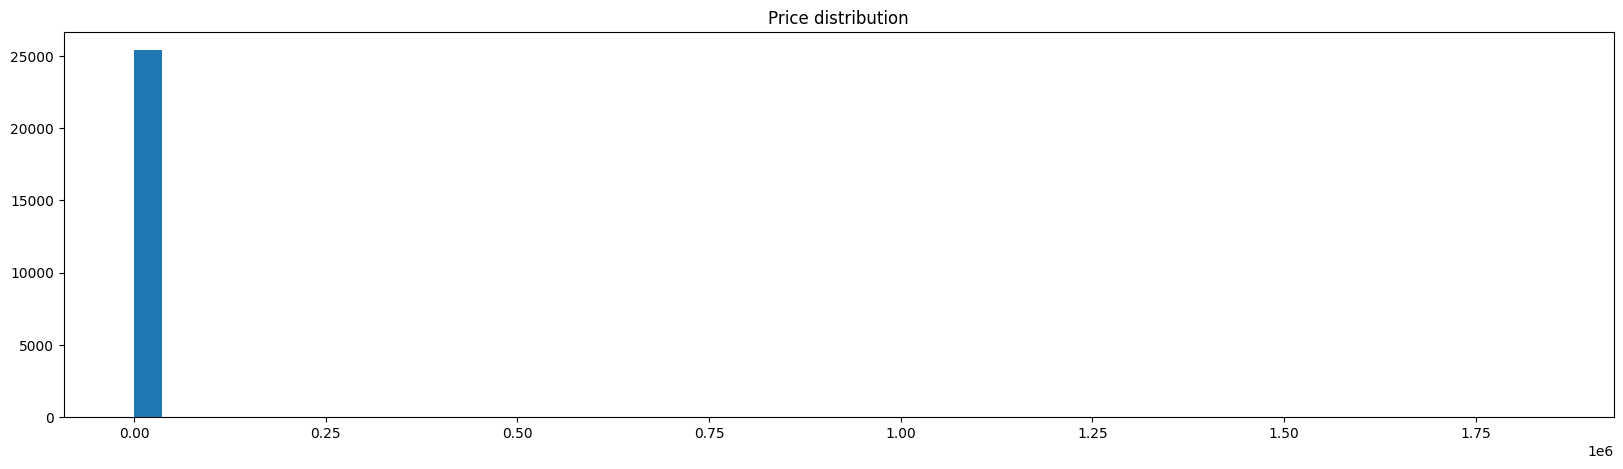

In [33]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

<span style="color: red;">This attribute has an extreme outlier making difficult a proper visualization?</span>

In [34]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

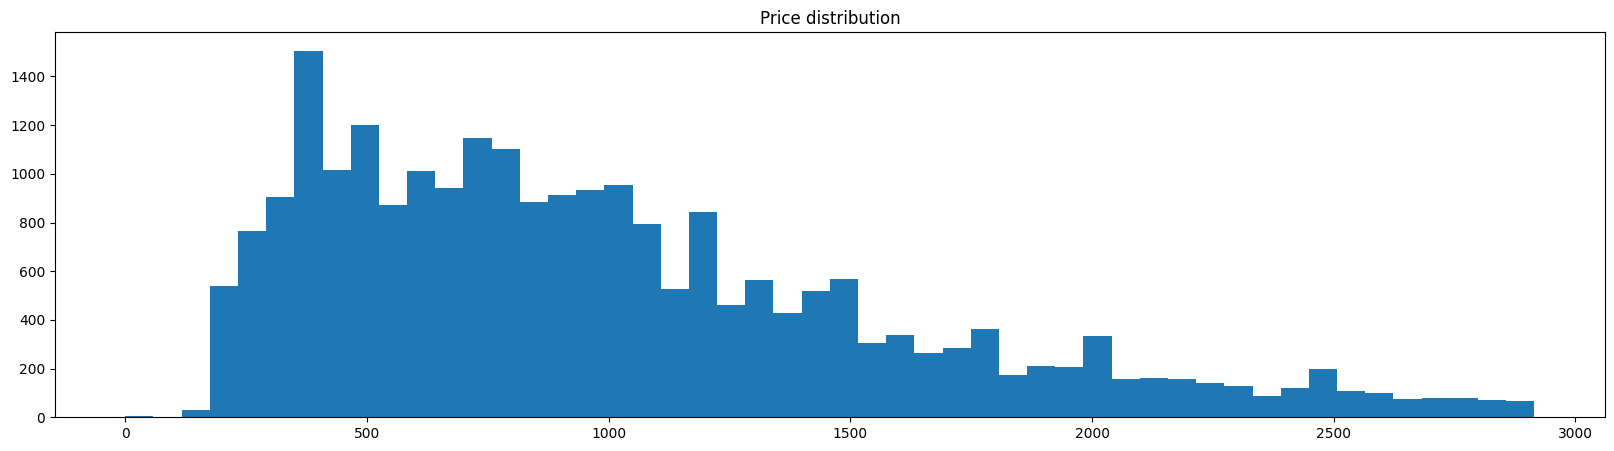

In [35]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

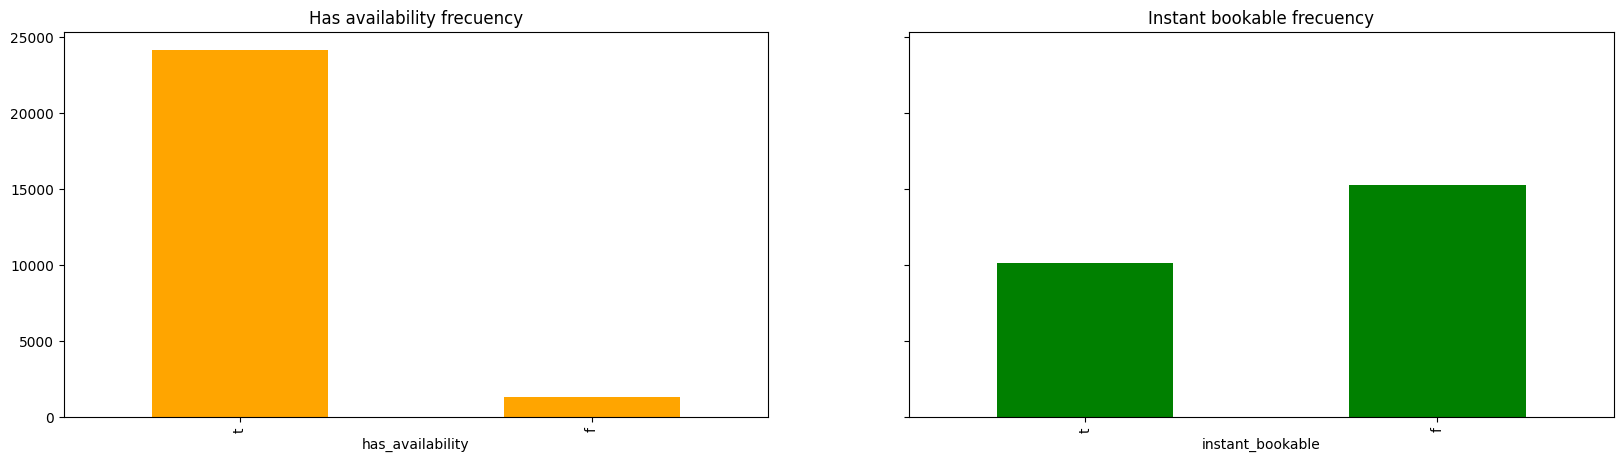

In [36]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

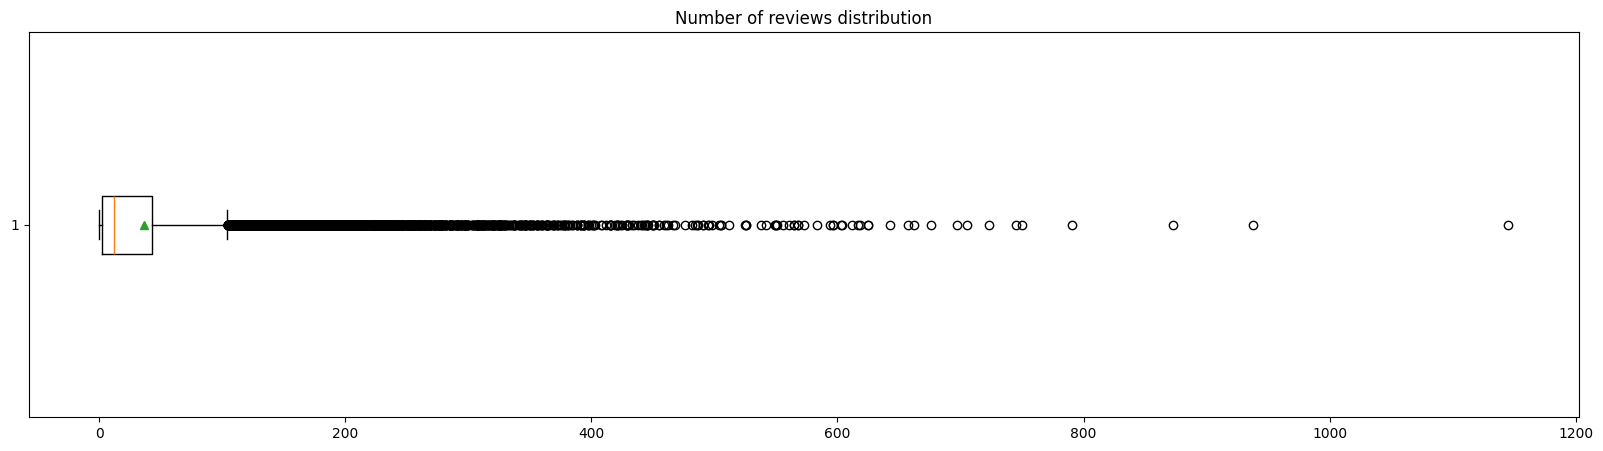

In [37]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

In [38]:
listings_df["number_of_reviews"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])


count    25425.000000
mean        36.688181
std         64.325192
min          0.000000
5%           0.000000
25%          2.000000
50%         12.000000
75%         43.000000
95%        158.800000
max       1145.000000
Name: number_of_reviews, dtype: float64

<h3>Leer el boxplot con las medidas descriptivas facilita. Se identifica que el Rango intercuartilico es desde 2 a 43 reviews. Alli se encuentra el 50% del universo de alojamientos. La media esta sobre los 36 comentarios y hay un alojamiento con 1145 reviews
</h3>

In [40]:
listings_df[listings_df["number_of_reviews"] == 1145]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float
10933,47718598,https://www.airbnb.com/rooms/47718598,20230627053501,2023-06-28,city scrape,Bed and breakfast in Mexico City · ★4.61 · 1 b...,We are a group of hotels with the aim of turni...,An area that will help you connect with the en...,https://a0.muscache.com/pictures/miso/Hosting-...,384418768,https://www.airbnb.com/users/show/384418768,Mauricio,2021-01-13,"Naucalpan de Juárez, Mexico",NaN,within an hour,98%,100%,f,https://a0.muscache.com/im/pictures/user/a2cd7...,https://a0.muscache.com/im/pictures/user/a2cd7...,Santa María la Ribera,7,7,"['email', 'phone']",t,t,"Mexico City, Ciudad de México, Mexico",Cuauhtémoc,NaN,19.44651,-99.1526,Private room in bed and breakfast,Private room,2,NaN,1 private bath,1.0,1.0,"[""Hangers"", ""Gym"", ""Hair dryer"", ""Body soap"", ...",$946.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,30,60,90,187,2023-06-28,1145,318,40,2021-01-16,2023-06-25,4.61,4.68,4.64,4.85,4.69,4.86,4.7,NaN,t,7,0,7,0,38.42,946.0


### 2. Bivariate analysis

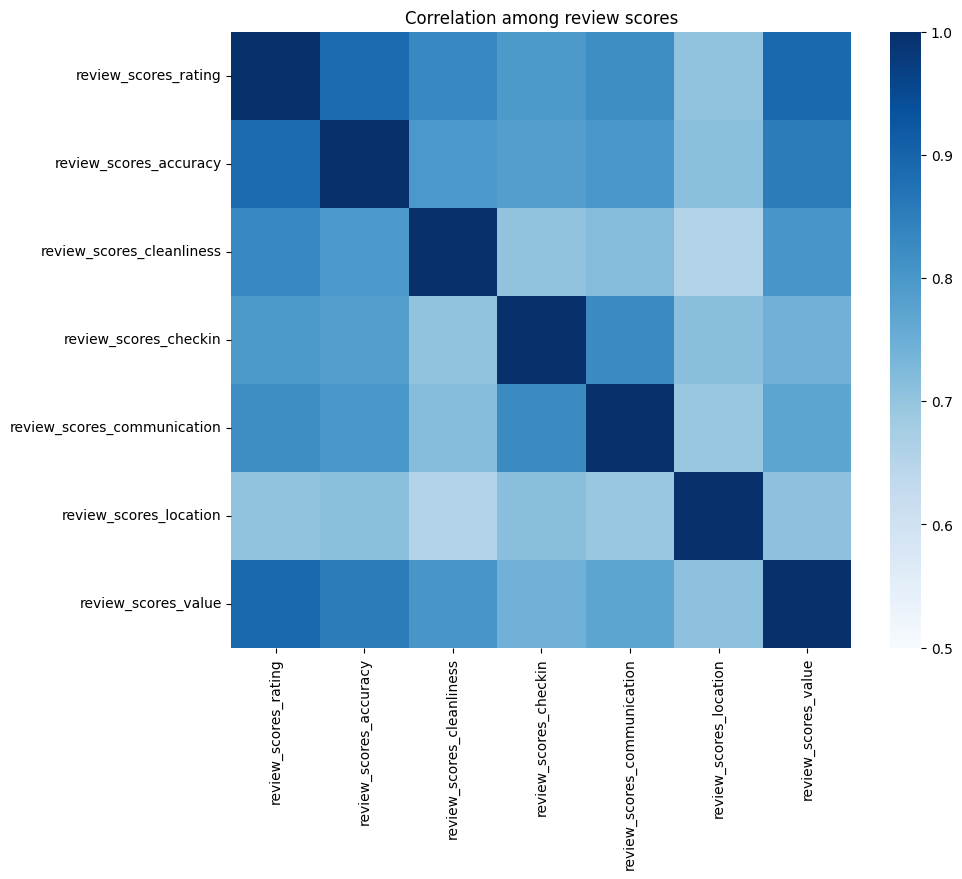

In [41]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

In [42]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(2365, 76)

La muestra se reduce mucho, pasa de casi 25000 registros a solo 2300. Esto es porque la distribución de precio float es sesgada fuertemente, la cola derecha es larga y deberia considerarse, solo que el analisis estandar boxplot es muy estricto. Se sugiere usar escala logaritmica para precios.


Mas adelate, la medida de asimetria confirma el sesgo a la derecha, la cola larga por ser >0


La curtosis tambipen es alta, lo que se puede leer como una distribución lepticurtica de colas pesadas

In [58]:
desc = listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
print(desc.apply(lambda x: f"{x:,.2f}"))

skewness = listings_df["price_float"].skew()
kurtosis = listings_df["price_float"].kurt()

descrip =  pd.Series({"asimetria": skewness, "curtosis": kurtosis})
print(descrip)

count       25,425.00
mean         1,631.51
std         14,976.23
min              0.00
5%             289.00
25%            550.00
50%            921.00
75%          1,497.00
95%          3,500.00
max      1,838,000.00
Name: price_float, dtype: object
asimetria      88.402940
curtosis     9645.503731
dtype: float64


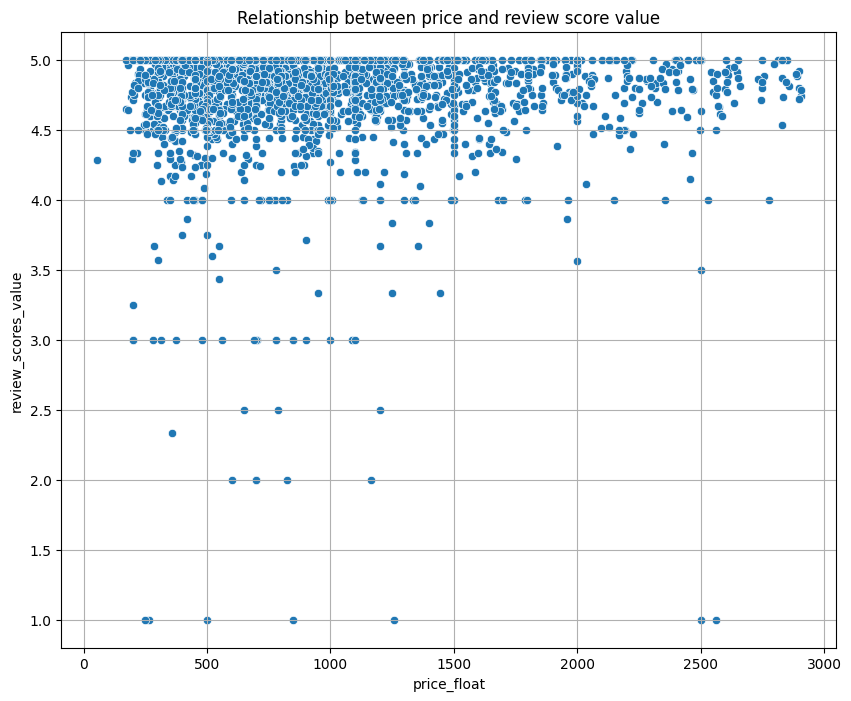

In [48]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [ ]:

# Correlación de Pearson (lineal)
corr_pearson = listings_df["price_float"].corr(listings_df["review_scores_value"], method="pearson")

print("Correlación de Pearson:", corr_pearson)


Correlación de Pearson: -0.03077527256131071


In [66]:
# Another common strategy for working with datasets with high variability is by filtering the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

#neighbourhood_frec_cumsum.shape
print(neighbourhood_frec_cumsum)

neighbourhood_cleansed
Cuauhtémoc                0.443776
Miguel Hidalgo            0.620138
Benito Juárez             0.750403
Coyoacán                  0.819194
Álvaro Obregón            0.861554
Tlalpan                   0.892035
Venustiano Carranza       0.916932
Cuajimalpa de Morelos     0.937581
Gustavo A. Madero         0.953078
Iztacalco                 0.964877
Iztapalapa                0.975733
Azcapotzalco              0.986273
Xochimilco                0.992134
La Magdalena Contreras    0.997404
Tláhuac                   0.999095
Milpa Alta                1.000000
Name: proportion, dtype: float64


la linea anterior contó los valores de barrio y lo muestra como frecencia relativa acumulada

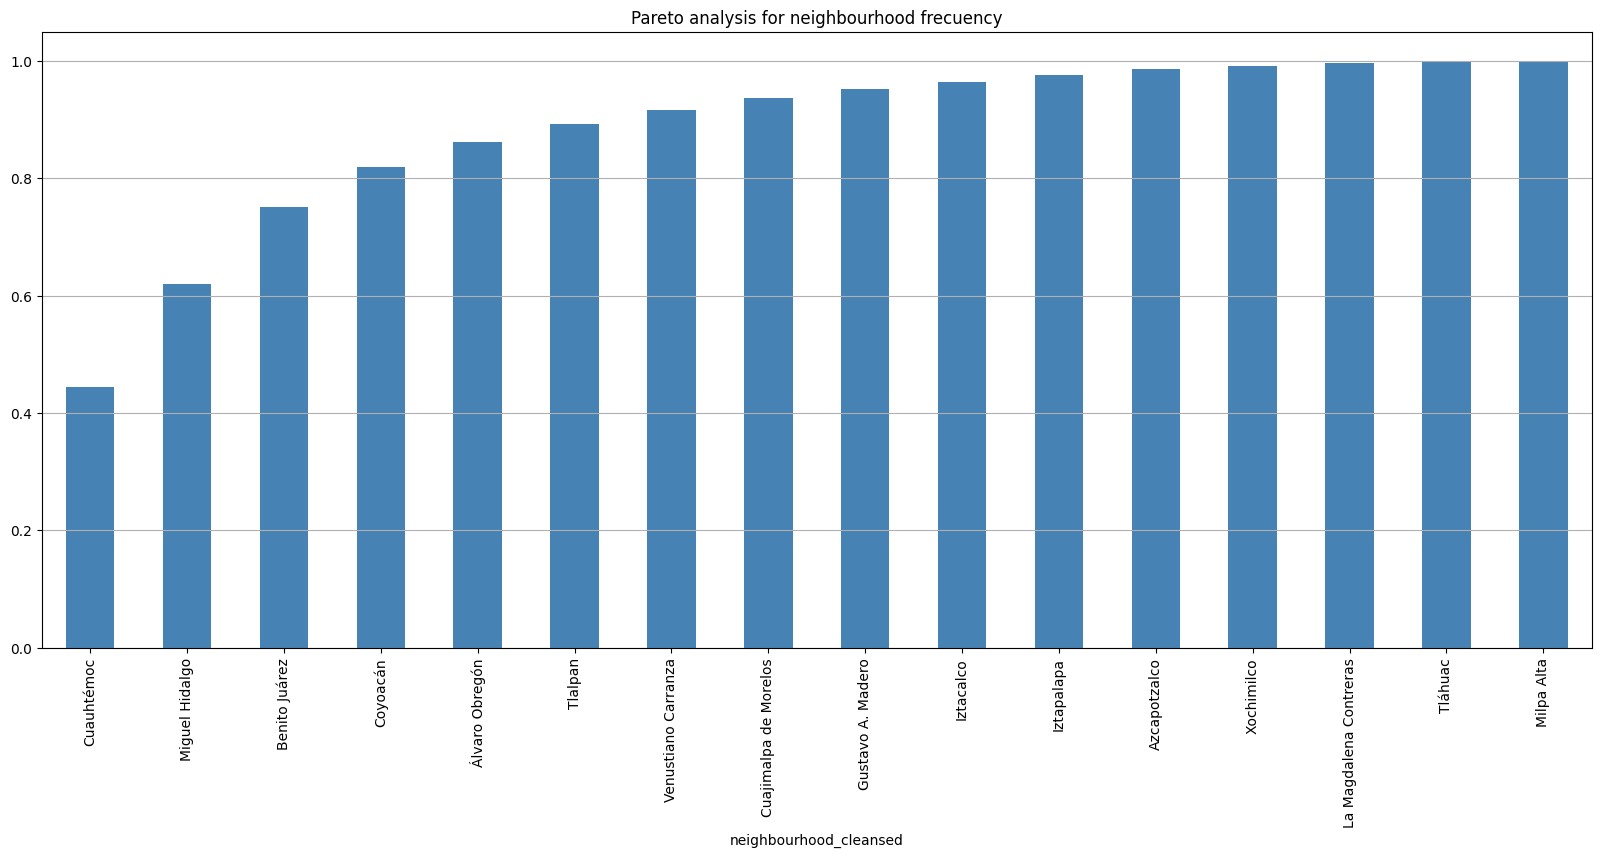

In [67]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

a continuación se eligen los barrios que cuentan como el 80% de los hospedajes 

In [68]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Cuauhtémoc', 'Miguel Hidalgo', 'Benito Juárez']

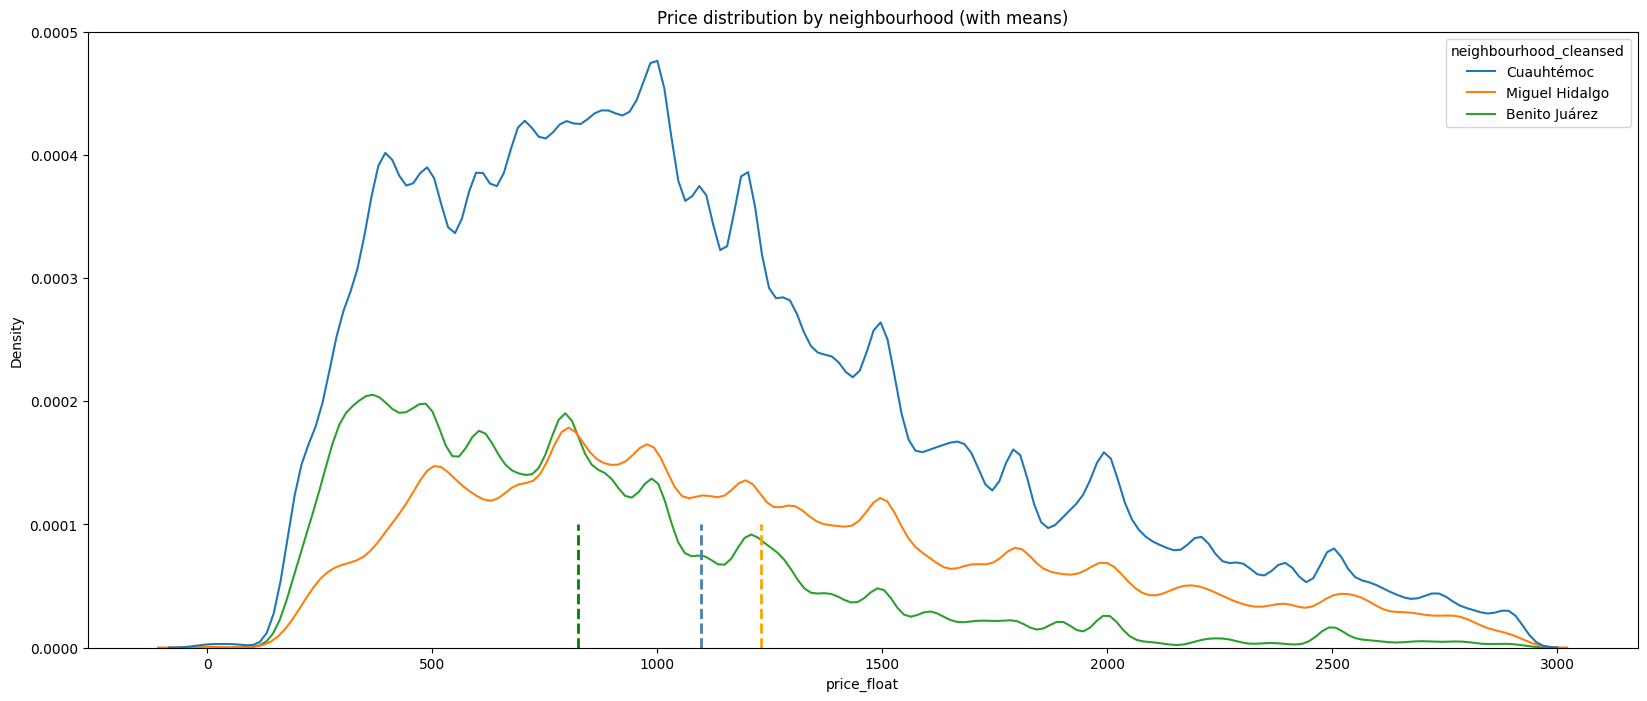

In [69]:
# Plotting price distribution by neighborhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

Teniendo los barrios que cuentan cn el 80% de los hospedajes, se realizó un grafico <h3>Kernel Density Estimation, KDE</h3>. Aqui se usó la variable cuantitatva continua precio, estimando la distribucion de probabilidad lo que permite suavizar los datos para mostrar como se concentran los valores. 


Eje x precios 
Eje y densidad ( no son conteos absolutos sino una estimasión suave a partir de la densidad)

Se agregan lineas punteadas son las medias por barrio 


Este tipo de gráfico es muy útil para comparar distribuciones entre categorías, porque no solo muestra la media, sino también la forma de la distribución (asimetría, colas, concentración de precios) para categorias especificas.


Si un barrio tiene una curva muy alta y angosta → la mayoría de sus precios están concentrados en un rango estrecho.

Si un barrio tiene una curva más baja y ancha → los precios están más dispersos.


Desues de revisado ste cuadernillo, este grafico me llama la atención porque los datos fueron limpiados estadisticamente para luego si hacer el gráfico

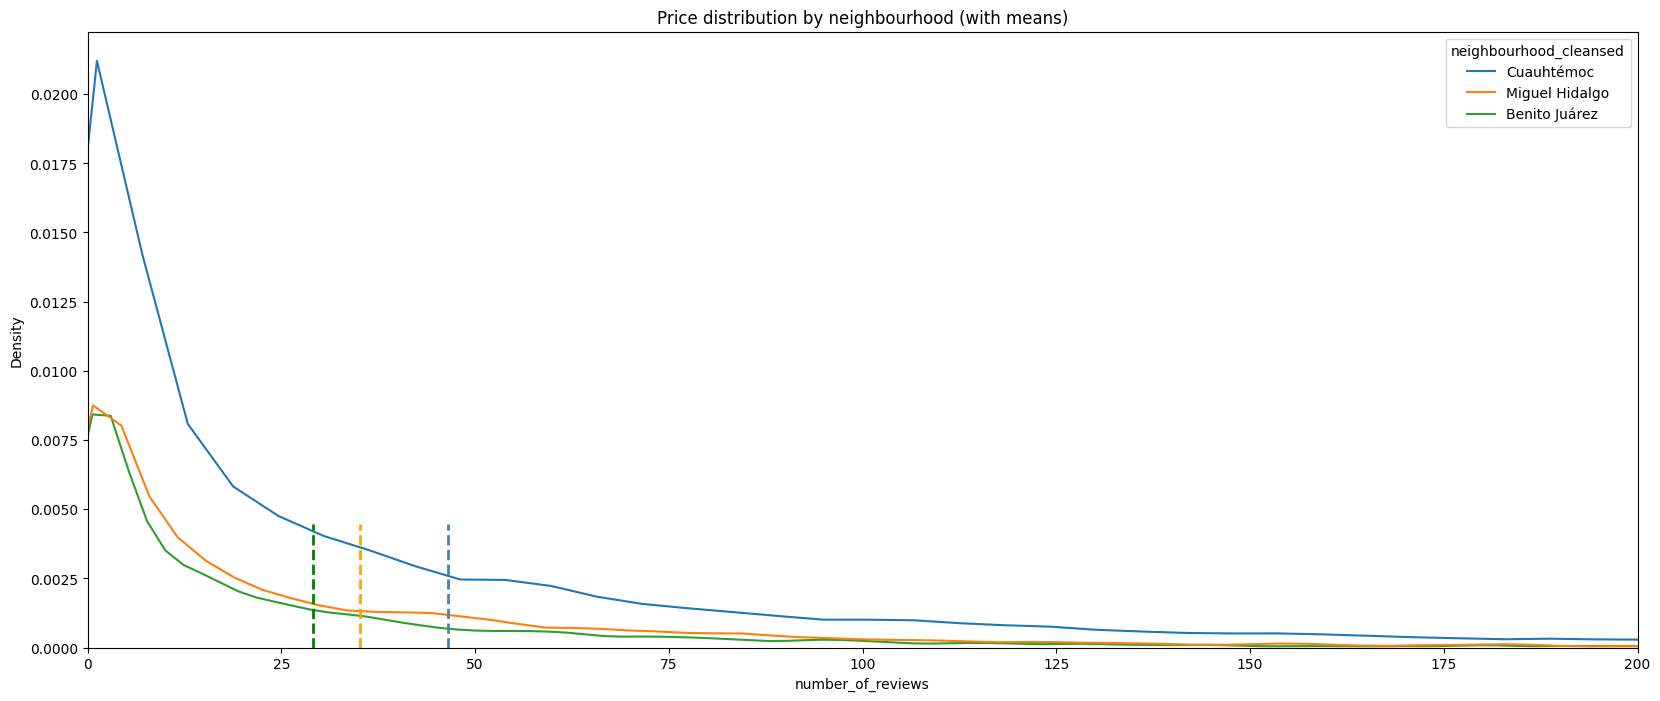

In [71]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()